## 2-5. 프로젝트: SentencePiece 사용하기
라이브러리 버전을 확인해 봅니다.  
사용할 라이브러리 버전을 둘러봅시다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.6.0
1.22.2
3.4.3
0.5.2


### Step 1. SentencePiece 설치하기
SentencePiece는 Google에서 제공하는 오픈소스 기반 Sentence Tokenizer/Detokenizer 로서, BPE와 unigram 2가지 subword 토크나이징  
모델 중 하나를 선택해서 사용할 수 있도록 패키징한 것입니다. 아래 링크의 페이지에서 상세한 내용을 파악할 수 있습니다.

google/sentencepiece: https://github.com/google/sentencepiece  
위 페이지의 서두에서도 언급하고 있듯, SentencePiece는 딥러닝 자연어처리 모델의 앞부분에 사용할 목적으로 최적화되어 있는데,  
최근 pretrained model들이 거의 대부분 SentencePiece를 tokenizer로 채용하면서 사실상 표준의 역할을 하고 있습니다.

다음과 같이 설치를 진행합니다. SentencePiece는 python에서 쓰라고 만들어진 라이브러리는 아니지만 편리한 파이썬 wrapper를  
아래와 같이 제공하고 있습니다.

pip install sentencepiece

### Step 2. SentencePiece 모델 학습
앞서 배운 tokenize() 함수를 기억하나요? 다시 한번 상기시켜드릴게요!

In [4]:
# def tokenize(corpus):  # corpus: Tokenized Sentence's List
#     tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
#     tokenizer.fit_on_texts(corpus)

#     tensor = tokenizer.texts_to_sequences(corpus)

#     tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

#     return tensor, tokenizer

위와 같이 tf.keras.preprocessing.text.Tokenizer에 corpus를 주고 tokenizer.fit_on_texts(corpus)을 하면 토크나이저 내부적으로  
단어사전과 토크나이저 기능을 corpus에 맞춤형으로 자동 생성해 주는 것입니다.

그럼 이를 위해서 SentencePiece 모델을 학습하는 과정을 거쳐야 합니다.

In [6]:
# import sentencepiece as spm
# import os
# temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

# vocab_size = 8000

# with open(temp_file, 'w') as f:
#     for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
#         f.write(str(row) + '\n')

# spm.SentencePieceTrainer.Train(
#     '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
# )
# #위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

# !ls -l korean_spm*

위 코드를 실행하면 정상적으로 SentencePiece 모델 학습이 완료된 후 korean_spm.model 파일과 korean_spm.vocab vocabulary  
파일이 생성되었음을 확인할 수 있습니다.

그럼 이렇게 학습된 SentencePiece 모델을 어떻게 활용하는지 살펴보겠습니다.

In [8]:
# s = spm.SentencePieceProcessor()
# s.Load('korean_spm.model')

# # SentencePiece를 활용한 sentence -> encoding
# tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
# print(tokensIDs)

# # SentencePiece를 활용한 sentence -> encoded pieces
# print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# # SentencePiece를 활용한 encoding -> sentence 복원
# print(s.DecodeIds(tokensIDs))

어떻습니까? SentencePiece의 토크나이징 실력이 괜찮은 것 같습니다.

### Step 3. Tokenizer 함수 작성
우리는 위에서 훈련시킨 SentencePiece를 활용하여 위 함수와 유사한 기능을 하는 sp_tokenize() 함수를 정의할 겁니다.  
하지만 SentencePiece가 동작하는 방식이 단순 토큰화와는 달라 완전히 동일하게는 정의하기 어렵습니다. 그러니 아래 조건을  
만족하는 함수를 정의하도록 하습니다.

1) 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 를 전달합니다.

2) 생성된 vocab 파일을 읽어와 { <word> : <idx> } 형태를 가지는 word_index 사전과 { <idx> : <word>} 형태를 가지는 index_word 사전을  
    생성하고 함께 반환합니다.

3) 리턴값인 tensor 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding은 당연히 해야겠죠?

In [9]:
# def sp_tokenize(s, corpus):

#     tensor = []

#     for sen in corpus:
#         tensor.append(s.EncodeAsIds(sen))

#     with open("./korean_spm.vocab", 'r') as f:
#         vocab = f.readlines()

#     word_index = {}
#     index_word = {}

#     for idx, line in enumerate(vocab):
#         word = line.split("\t")[0]

#         word_index.update({idx:word})
#         index_word.update({word:idx})

#     tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

#     return tensor, word_index, index_word

In [10]:
# #sp_tokenize(s, corpus) 사용예제

# my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
# tensor, word_index, index_word = sp_tokenize(s, my_corpus)
# print(tensor)

### Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기
네이버 영화리뷰 감정 분석 태스크가 있습니다. 한국어로 된 corpus를 다루어야 하므로 주로 KoNLPy에서 제공하는 형태소 분석기를  
사용하여 텍스트를 전처리해서 RNN 모델을 분류기로 사용하게 되는데요.

만약 이 문제에서 tokenizer를 SentencePiece로 바꾸어 다시 풀어본다면 더 성능이 좋아질까요? 비교해 보는 것도 흥미로울 것입니다.

- 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기
- 학습된 모델로 sp_tokenize() 메소드 구현하기
- 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기
- KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
- (보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

Word Vector는 활용할 필요가 없습니다. 활용이 가능하지도 않을 것입니다.

### 1단계: SentencePiece 설치하기

In [11]:
# $ pip install sentencepiece

### 2단계: SentencePiece 모델화 및 학습시키기

In [13]:
import os
import numpy as np
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f: 
    raw = f.read().splitlines() # 줄 단위로 읽어봅시다.

In [14]:
min_len = 999
max_len = 0

for sen in raw:
    length = len(sen)
    
    # 문장 최소 길이 찾기
    if min_len > length: 
        min_len = length
    
    # 문장 최대 길이 찾기
    if max_len < length: 
        max_len = length
        
    
sentence_length = np.zeros((max_len), dtype=np.int)

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.

filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

/tmp/ipykernel_107/1943799563.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


In [15]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

# vacab size
vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.
# input: 입력 corpus
# prefix: 저장할 모델 이름
# vocab_size: vocab 개수 (기본 8,000)


!ls -l korean_spm*

# SentencePiece 모델 학습이 완료된 후 koreanspm.model 파일과 koreanspm.vocab vocabulary 파일이 생성되었음을 확인

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376725 Mar 23 03:11 korean_spm.model
-rw-r--r-- 1 root root 146094 Mar 23 03:11 korean_spm.vocab


In [16]:
# 학습된 SentencePiece 활용하기

s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1255, 11, 304, 7, 3606, 11, 285, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


### 3단계: sp_tokenize() 함수를 정의하기

In [17]:
# 메서드 구현
import tensorflow as tf
# s = spm.SentencePieceProcessor()
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen)) # 숫자로 임베딩

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post') # 패딩까지 // 세 문장 중 가장 긴 것을 토대로 패딩?

    return tensor, word_index, index_word

In [18]:
import tensorflow as tf
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['아버지가 방에 들어가신다.','나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)
# print(word_index)
# print(index_word)

[[1255   11  833    7 2342  285   38    3    0    0    0    0    0    0]
 [1957 5607    5    4 7975 2012    3    0    0    0    0    0    0    0]
 [ 108 1658  101    4    0  470   11    4   14    0 2002    3    3    3]]


### 4단계 네이버 데이터 불러오기 

In [20]:
!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 17.27 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Updating files: 100% (14737/14737), done.


In [21]:
import pandas as pd
train_data = pd.read_table("nsmc/"+"ratings_train.txt")
test_data = pd.read_table("nsmc/"+"ratings_test.txt")

display(train_data.head())
display(test_data.head())

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


### 5단계 : 데이터 정제하기

In [22]:
print("학습데이터 유니크 :",train_data['document'].nunique()) #  약 4,000개의 중복 샘플이 존재
print("타겟데이터 유니크 : ",train_data['label'].nunique())

학습데이터 유니크 : 146182
타겟데이터 유니크 :  2


In [23]:
# 중복데이터 제거
train_data.drop_duplicates(subset=['document'], inplace=True) # drop_duplicates 활용

In [24]:
# document에 null 값이 있는지 확인
print(train_data.isnull().values.any())

True


In [25]:
# Null값 제거
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [26]:
# 데이터 전처리
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거
train_data[:5]

/tmp/ipykernel_107/789371173.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [27]:
# null 데이터 삭제
train_data = train_data.dropna(how = 'any')
print(len(train_data))

146182


In [28]:
# 테스트데이터에도 동일한 과정 진행
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48852


/tmp/ipykernel_107/3707744765.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
/tmp/ipykernel_107/3707744765.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경


문장의 최단 길이: 0
문장의 최장 길이: 140
문장의 평균 길이: 32
sentence_length :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/tmp/ipykernel_107/2857138701.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


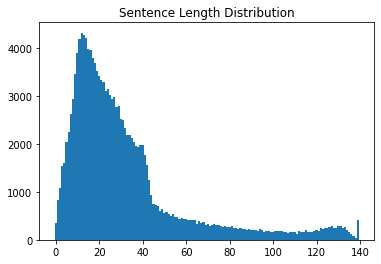

In [29]:
# 데이터 길이 분포 확인하기
import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for sen in train_data['document']:
    length = len(sen)
    
    # 문장 최소 길이 찾기
    if min_len > length: 
        min_len = length
    
    # 문장 최대 길이 찾기
    if max_len < length: 
        max_len = length
        
    # 전체 문장을 합치면 길이가 얼마나 될까요?
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(train_data))

# 전체 길이만큼 0벡터 ==> 길이에 따른 문장의 수를 저장하기 위해 먼저 0으로 이루어진 리스트를 만든다!!
sentence_length = np.zeros((max_len), dtype=np.int)
print("sentence_length : ",sentence_length)

print("="*60)

# raw는 위에서 다운로드한 데이터셋!! 전체 길이와 상관없음
for sen in train_data['document']:
    sentence_length[len(sen)-1] += 1 # 0으로 이루어진 벡터에 문장 count를 더한 뒤 넣는다.

plt.bar(range(max_len), sentence_length, width=1.0) # 너비는 1.0씩 늘어나도록 설정
plt.title("Sentence Length Distribution")
plt.show()

In [30]:
# 데이터 분포를 고려해 50 이하 단어는 제거 
train_list = [s for s in train_data['document'] if (len(s) <= 50)]
test_list = [s for s in test_data['document'] if (len(s) <= 50)]

train_list = list(set(train_list))
test_list = list(set(test_list))

train_df = pd.DataFrame(train_list)
test_df = pd.DataFrame(test_list)

In [31]:
# 길이 50이하인 데이터를 기존 데이터와 병합합니다.

new_train_df = pd.merge(train_data, train_df, how='inner', left_on='document', right_on=0)
new_test_df = pd.merge(test_data, test_df, how='inner', left_on='document', right_on=0)

train_data = new_train_df[['id', 'document', 'label']]
test_data = new_test_df[['id', 'document', 'label']]

In [32]:
display(train_data.head())
display(test_data.head())

print("훈련데이터 : ",len(train_data))
print("테스트데이터 : ",len(test_data))

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0


,id,document,label
0,6270596,굳 ㅋ,1
1,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
2,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
3,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
4,7898805,음악이 주가 된 최고의 음악영화,1


훈련데이터 :  122623
테스트데이터 :  40930


In [33]:
# 데이터셋 분리하기 

X_train,X_train_word_index, X_train_index_word = sp_tokenize(s, train_data['document'])
X_test,X_test_word_index, X_test_index_word = sp_tokenize(s, test_data['document'])

In [34]:
# 현재 list 상태 ==> ndarray로 바꿔주기
y_train = np.array(list(train_data['label']))
y_test = np.array(list(test_data['label']))

In [35]:
print(X_train[:2])
print(X_test[:2])

[[ 138  106 2662  918 4930    4 4930  839   69  553  517 2630    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   4 7660  465 1773  144   14  440 3232 2763 1800  177  410  394   41
  4251    4   11 7571   29 2410  242   69    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]]
[[   4 7889    4    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   4 7826  165   25 1105  349  107  180 5502  162 4305  645    4 3412
    10  106  381 7630 2509    0   89    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]


In [36]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [37]:
# 순환신경망 모델 선언

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(8000,16))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          128000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 128,881
Trainable params: 128,881
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_input, train_target, epochs=10, validation_data=(val_input, val_target))

Epoch 1/10
3066/3066 [==============================] - 79s 25ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.4975
Epoch 2/10
3066/3066 [==============================] - 75s 24ms/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 3/10
3066/3066 [==============================] - 75s 24ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 4/10
3066/3066 [==============================] - 75s 24ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4975
Epoch 5/10
3066/3066 [==============================] - 75s 24ms/step - loss: 0.6651 - accuracy: 0.5815 - val_loss: 0.6619 - val_accuracy: 0.5905
Epoch 6/10
3066/3066 [==============================] - 74s 24ms/step - loss: 0.6396 - accuracy: 0.6343 - val_loss: 0.6437 - val_accuracy: 0.6158
Epoch 7/10
3066/3066 [==============================] - 75s 24ms/step - loss: 0.6895 - accuracy: 0.5104 - val_loss: 0.6929 -

In [40]:
result = model.evaluate(X_test,  y_test, verbose=2)
print(result)

1280/1280 - 7s - loss: 0.6241 - accuracy: 0.6657
[0.6240721940994263, 0.6657219529151917]


[회고]

이번 Exp는 이해가 잘 안간다. 다시 봐야 할 듯. 